In [1]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
import os
# Add the scripts directory to the sys.path
scripts_path = os.path.abspath('../scripts')
sys.path.append(scripts_path)
import data_preprocessing as dp

In [2]:
# Load the dataset
df = dp.load_and_preprocess_data('../data/lung_cancer.csv')

In [3]:
# Separate features and target variable
X = df.drop('LUNG CANCER', axis=1)
y = df['LUNG CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anton\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "

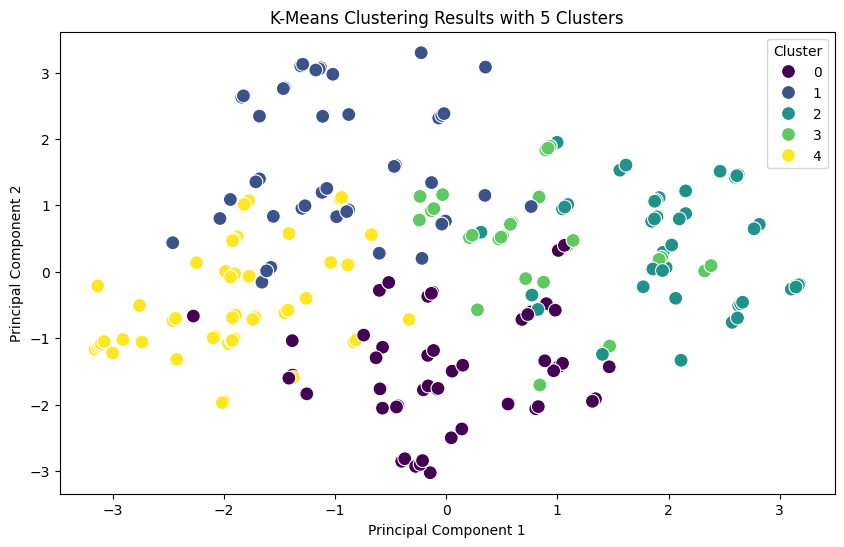

In [4]:
# K-Means clustering
num_clusters = 5  # Nombre de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['kmeans_cluster'], palette="viridis", s=100, marker='o')
plt.title(f"K-Means Clustering Results with {num_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()


Cluster distribution:
 kmeans_cluster
4    62
2    61
0    61
1    58
3    34
Name: count, dtype: int64

Cluster Centers (K-Means):
      GENDER       AGE   SMOKING  YELLOW FINGERS   ANXIETY  PEER PRESSURE  \
0 -0.635810 -0.067569 -0.465770       -0.435940 -0.861629      -0.096470   
1  0.177986 -0.042765 -0.087287        0.299591  0.662436       0.295883   
2  0.873021 -0.053849  0.521577       -1.132577 -0.828841      -0.719486   
3  0.677181  0.232363 -0.559665        0.738783  0.066072      -0.190983   
4 -0.771245  0.032041  0.333662        0.857816  1.007273       0.630735   

   CHRONIC DISEASE   FATIGUE   ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0         0.333887  0.262005 -0.341624 -0.308690          -0.744635 -0.203727   
1         0.301635 -0.892090 -0.129260 -0.094624           0.487272 -0.956416   
2        -0.256836  0.123274  0.646376  0.349976           0.804340  0.592431   
3        -0.455674  0.339531  0.082635  0.437153           0.903211  0.798300   
4    

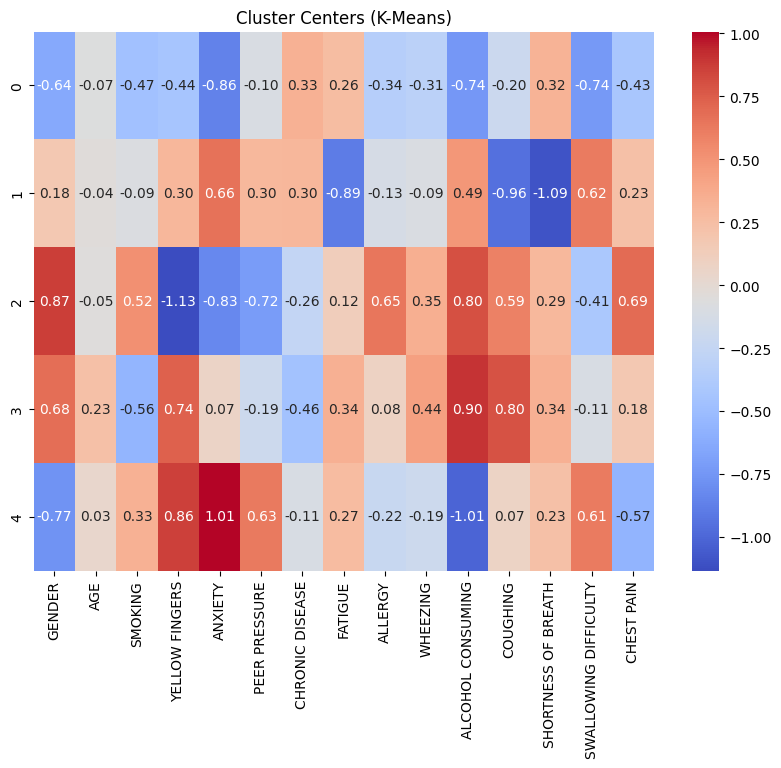

In [ ]:
# Distribution des clusters
print("Cluster distribution:\n", df['kmeans_cluster'].value_counts())

# Analyse des clusters
cluster_centers_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("\nCluster Centers (K-Means):\n", cluster_centers_kmeans)

plt.figure(figsize=(10, 7))
sns.heatmap(cluster_centers_kmeans, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("KMeans Cluster Centers (K-Means)")
plt.show()


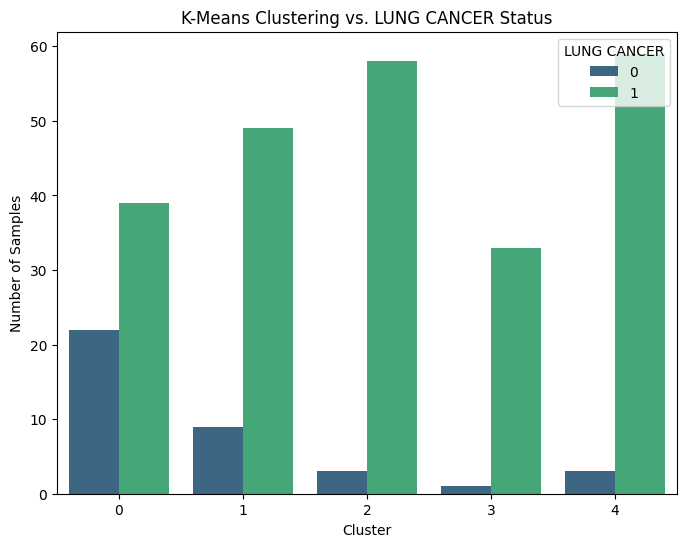

In [6]:
# Comparaison avec le statut LUNG CANCER
plt.figure(figsize=(8, 6))
sns.countplot(x='kmeans_cluster', hue='LUNG CANCER', data=df, palette='viridis')
plt.title("K-Means Clustering vs. LUNG CANCER Status")
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='LUNG CANCER', loc='upper right')
plt.show()